In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('vehicles.csv')
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


### `.apply()`

**Cuidado:**`.apply()` permite aplicar cualquier funcion creada por el usuario sobre una serie de PANDAS. Si bien pareciera ser un metodo sumamente util, hay que tener precaucion cuando se lo usa porque puede ser muy lento. Este metodo llama a la funcion en custion para cada valor de la serie, y por lo tanto puede volverse un poco lento cuando la serie tiene millones de datos.

In [6]:
city_mpg = data.city08
city_mpg

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

In [8]:
# devuelve True si el valor de la serie es mayor a 20. Devuelve False si no lo es.
def gt20(val):
    return val > 20

In [9]:
city_mpg.apply(gt20)

0        False
1        False
2         True
3        False
4        False
         ...  
41139    False
41140    False
41141    False
41142    False
41143    False
Name: city08, Length: 41144, dtype: bool

In [10]:
%%timeit
city_mpg.apply(gt20)

13.5 ms ± 256 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### `.gt()`
Get Greater than of dataframe and other, element-wise (binary operator gt).
La misma funcion que apply(gt(20)) la podemos cumplir con un funcion builtin de PANDAS y es muchisimo mas rapida

In [12]:
%%timeit
city_mpg.gt(20)

117 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Notar que el metodo `.gt()` es muchisimo mas rapido que el metodo `.apply()`. En algunos casos (como este) esta diferencia puede no ser importante, pero en otros caso implicara minutos u horas entre un metodo y otro.

### Otro ejemplo de `apply()`

In [14]:
make = data.make
make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

In [19]:
make.value_counts()

Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: make, Length: 136, dtype: int64

In [22]:
type(make.value_counts().index[:5])

pandas.core.indexes.base.Index

In [29]:
# definimos una funcion que si la marca esta dentro del grupo de las 5 marcas mas comunes le deja le nombre 
# pero si no esta dentro de esa lista, la reemplaza por "other"
top_5 = make.value_counts()[:5]
def generalize_top5(val):
    if val in top_5:
        return val
    return 'other'

In [30]:
make.apply(generalize_top5)

0        other
1        other
2        Dodge
3        Dodge
4        other
         ...  
41139    other
41140    other
41141    other
41142    other
41143    other
Name: make, Length: 41144, dtype: object

In [31]:
make.apply(generalize_top5).value_counts()

other        26622
Chevrolet     4003
Ford          3371
Dodge         2583
GMC           2494
Toyota        2071
Name: make, dtype: int64

### `.where()`

In [33]:
make.where(make.isin(top_5), other = 'other')

0        other
1        other
2        other
3        other
4        other
         ...  
41139    other
41140    other
41141    other
41142    other
41143    other
Name: make, Length: 41144, dtype: object

### `.apply()` Vs `.where()`

In [34]:
%%timeit
make.apply(generalize_top5)

43.1 ms ± 1.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
%%timeit
make.where(make.isin(top_5), other = 'other')

3.12 ms ± 495 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Nuevamente vemos el metodo built in de Pandas `.where()` es mas rapido que el `.apply()`

### if, else with Pandas

Supongamos que queremos trabajar nuevamente sobre la serie make. En esta oportunidad queremos mantener los nombres de las marcas top 5, a las marcas top 10 marcarlas como top_10 y al resto dejarlas como "other". No existe en Pandas un funcion para hacer esto. Pero si podemos definir una funcion para hacer esto y utilizar el metodo `.apply()` o utilizar en forma encadenada el metodo `.where()`

#### `.apply()`

In [37]:
vc = make.value_counts()
top5 = vc.index[:5]
top10 = vc.index[:10]

def generalize(val):
    if val in top5:
        return val
    elif val in top10:
        return 'top10'
    else:
        return 'other'

In [41]:
make.apply(generalize)

0        other
1        other
2        Dodge
3        Dodge
4        other
         ...  
41139    other
41140    other
41141    other
41142    other
41143    other
Name: make, Length: 41144, dtype: object

In [42]:
make.apply(generalize).value_counts()

other        19400
top10         7222
Chevrolet     4003
Ford          3371
Dodge         2583
GMC           2494
Toyota        2071
Name: make, dtype: int64

`.where()` encadenados

In [43]:
(make
 .where(make.isin(top5), 'top10')
 .where(make.isin(top10), 'other')
)

0        other
1        other
2        Dodge
3        Dodge
4        other
         ...  
41139    other
41140    other
41141    other
41142    other
41143    other
Name: make, Length: 41144, dtype: object

In [44]:
(make
 .where(make.isin(top5), 'top10')
 .where(make.isin(top10), 'other')
).value_counts()

other        19400
top10         7222
Chevrolet     4003
Ford          3371
Dodge         2583
GMC           2494
Toyota        2071
Name: make, dtype: int64

#### `np.select()`
Una tercera opcion seria usar la funcion de Numpy `.select()`

In [46]:
import numpy as np

In [48]:
pd.Series(np.select([make.isin(top5), make.isin(top10)], [make, 'top 10'], 'other'))

0        other
1        other
2        Dodge
3        Dodge
4        other
         ...  
41139    other
41140    other
41141    other
41142    other
41143    other
Length: 41144, dtype: object

### Missing Data

In [49]:
cyl = data.cylinders
cyl

0         4.0
1        12.0
2         4.0
3         8.0
4         4.0
         ... 
41139     4.0
41140     4.0
41141     4.0
41142     4.0
41143     4.0
Name: cylinders, Length: 41144, dtype: float64

In [51]:
# cuantos valores faltantes tiene la serie (o la columna cylinders)
(data
 .cylinders
 .isna()
 .sum()
)

206

In [53]:
# a que marcas corresponden esos missing values?
# creamos una serie de booleanos que tiene True en los indices que tiene nan en la columna cylinders y False en las
# que tienen datos
missing = data.cylinders.isna()
missing

0        False
1        False
2        False
3        False
4        False
         ...  
41139    False
41140    False
41141    False
41142    False
41143    False
Name: cylinders, Length: 41144, dtype: bool

In [54]:
data.make[missing]

7138     Nissan
7139     Toyota
8143     Toyota
8144       Ford
8146       Ford
          ...  
34563     Tesla
34564     Tesla
34565     Tesla
34566     Tesla
34567     Tesla
Name: make, Length: 206, dtype: object

In [55]:
data.make[missing].value_counts()

Tesla              74
smart              16
Ford               15
Nissan             14
BMW                10
Chevrolet           8
Honda               7
Kia                 7
Fiat                7
Toyota              7
BYD                 7
Volkswagen          5
Mitsubishi          5
Hyundai             4
Mercedes-Benz       4
Jaguar              2
Azure Dynamics      2
CODA Automotive     2
GMC                 2
Subaru              2
Scion               1
MINI                1
Plymouth            1
Dodge               1
Mazda               1
Audi                1
Name: make, dtype: int64

### Filling in Missing Data

De analisis anterior surge que muchos de la utos que tienen valores faltantes en la columna cylinders es porque son autos electricos que no tienen cilindors (por ejemplo los de marca Tesla).

#### `.fillna()`

In [56]:
cyl.fillna(0)

0         4.0
1        12.0
2         4.0
3         8.0
4         4.0
         ... 
41139     4.0
41140     4.0
41141     4.0
41142     4.0
41143     4.0
Name: cylinders, Length: 41144, dtype: float64

In [61]:
# en este caso reemplams TODOS los nan con el valor 0. Eso podria no ser correcto. 
# Sin embargo aprendimos una manera de imputar datos faltantes
cyl.fillna(0).value_counts()

4.0     15938
6.0     14284
8.0      8801
5.0       771
12.0      626
3.0       279
0.0       206
10.0      170
2.0        59
16.0       10
Name: cylinders, dtype: int64

In [64]:
# otra opcion seri imputar los datos faltantes con la media de la serie
display(cyl.mean())
display((cyl
 .fillna(cyl.mean())
))


5.717084371488593

0         4.0
1        12.0
2         4.0
3         8.0
4         4.0
         ... 
41139     4.0
41140     4.0
41141     4.0
41142     4.0
41143     4.0
Name: cylinders, Length: 41144, dtype: float64

In [66]:
(cyl
 .fillna(cyl.mean())
).value_counts()

4.000000     15938
6.000000     14284
8.000000      8801
5.000000       771
12.000000      626
3.000000       279
5.717084       206
10.000000      170
2.000000        59
16.000000       10
Name: cylinders, dtype: int64

### Interpolating Data. `.interpolate()`
Esta funcion es super importante para imputar datos faltantes en series de tiempo. Permite estimar el dato faltante a partir de los datos de alrededor.

In [67]:
# definimos una serie temporal que registra valores de temperatura
temp = pd.Series([32, 40, None, 42, 39, 32])
temp

0    32.0
1    40.0
2     NaN
3    42.0
4    39.0
5    32.0
dtype: float64

<AxesSubplot:>

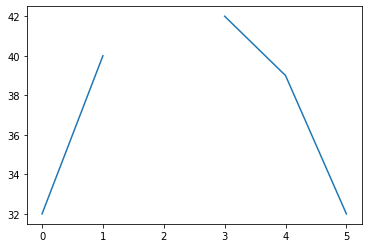

In [72]:
temp.plot.line()

In [73]:
temp.interpolate()

0    32.0
1    40.0
2    41.0
3    42.0
4    39.0
5    32.0
dtype: float64

<AxesSubplot:>

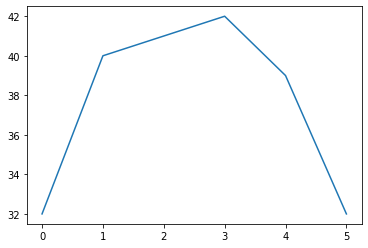

In [74]:
temp.interpolate().plot.line()

El dato imputado no genera un cambio grande en el forma de los datos y permitiria que todos los datos de esa fil fueran usados para entrenar un modelo de ML. En general los algoritmos de ML no admiten la presencia de datos faltantes.

### Clippind data. `.clip()`
Assigns values outside boundary to boundary values.
Es muy util cuando tenemos outliars entre nuestros datos

<AxesSubplot:ylabel='Density'>

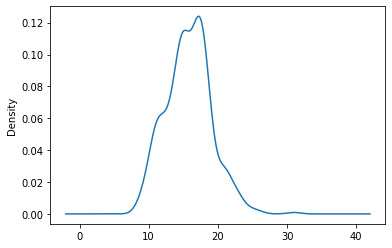

In [82]:
city_mpg.loc[:447].plot.kde()

<AxesSubplot:>

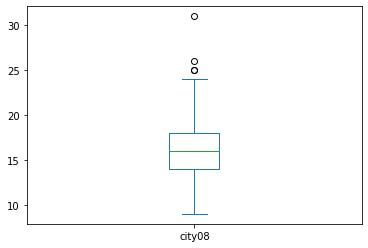

In [83]:
city_mpg.loc[:447].plot.box()

In [84]:
(city_mpg
 .loc[:447]
 .clip(lower = city_mpg.quantile(0.05),
       upper = city_mpg.quantile(0.95))
)

0      19.0
1      11.0
2      23.0
3      11.0
4      17.0
       ... 
443    15.0
444    15.0
445    15.0
446    27.0
447    15.0
Name: city08, Length: 448, dtype: float64

<AxesSubplot:ylabel='Density'>

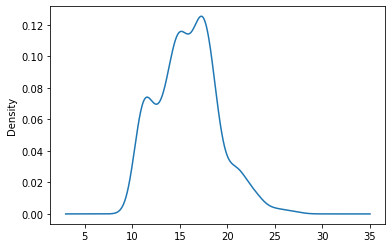

In [85]:
(city_mpg
 .loc[:447]
 .clip(lower = city_mpg.quantile(0.05),
       upper = city_mpg.quantile(0.95))
).plot.kde()

<AxesSubplot:>

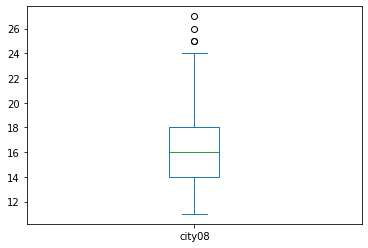

In [86]:
(city_mpg
 .loc[:447]
 .clip(lower = city_mpg.quantile(0.05),
       upper = city_mpg.quantile(0.95))
).plot.box()

### `.sot_values()` y `.sot_index()` 

In [87]:
city_mpg.sort_values()

7901       6
34557      6
37161      6
21060      6
35887      6
        ... 
34563    138
34564    140
32599    150
31256    150
33423    150
Name: city08, Length: 41144, dtype: int64

In [88]:
city_mpg.sort_values(ascending = False)

32599    150
31256    150
33423    150
34564    140
34563    138
        ... 
21060      6
35887      6
37161      6
7901       6
34557      6
Name: city08, Length: 41144, dtype: int64

In [89]:
# el metodo sort_index() nos devuelve el mismo orden que teniamos antes de aplicar el sort_values()
city_mpg.sort_values().sort_index()

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

### Exercises

#### 1. Create a series from a numeric column that has the value of 'high' if it is equal to or above the mean and 'low' if it is below the mean using .apply.


In [94]:
data.select_dtypes(include = int)

,city08,cityA08,co2,co2A,comb08,combA08,engId,feScore,fuelCost08,fuelCostA08,...,lv2,lv4,pv2,pv4,range,year,youSaveSpend,phevCity,phevHwy,phevComb
0,19,0,-1,-1,21,0,9011,-1,2000,0,...,0,0,0,0,0,1985,-2250,0,0,0
1,9,0,-1,-1,11,0,22020,-1,3850,0,...,0,0,0,0,0,1985,-11500,0,0,0
2,23,0,-1,-1,27,0,2100,-1,1550,0,...,0,0,0,0,0,1985,0,0,0,0
3,10,0,-1,-1,11,0,2850,-1,3850,0,...,0,0,0,0,0,1985,-11500,0,0,0
4,17,0,-1,-1,19,0,66031,-1,2700,0,...,0,14,0,90,0,1993,-5750,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,19,0,-1,-1,22,0,66030,-1,1900,0,...,0,14,0,90,0,1993,-1750,0,0,0
41140,20,0,-1,-1,23,0,66030,-1,1850,0,...,0,14,0,90,0,1993,-1500,0,0,0
41141,18,0,-1,-1,21,0,66030,-1,2000,0,...,0,14,0,90,0,1993,-2250,0,0,0
41142,18,0,-1,-1,21,0,66030,-1,2000,0,...,0,14,0,90,0,1993,-2250,0,0,0


In [96]:
# nos vamos a quedar con la columna fuelCost08
fuel = data.fuelCost08
fuel.describe()

count    41144.000000
mean      2362.335942
std        654.981925
min        500.000000
25%       1900.000000
50%       2350.000000
75%       2700.000000
max       7400.000000
Name: fuelCost08, dtype: float64

<AxesSubplot:ylabel='Density'>

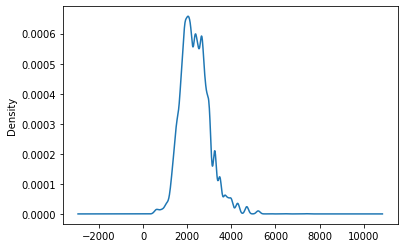

In [98]:
fuel.plot.kde()

In [99]:
fuel.mean()

2362.335942057165

In [103]:
def label_fuel(val):
    if val >= fuel.mean():
        return 'High'
    return 'Low'

In [104]:
fuel.apply(label_fuel)

0         Low
1        High
2         Low
3        High
4        High
         ... 
41139     Low
41140     Low
41141     Low
41142     Low
41143    High
Name: fuelCost08, Length: 41144, dtype: object

### 2. Create a series from a numeric column that has the value of 'high' if it is equal to or above the mean and 'low' if it is below the mean using np.select.

In [107]:
np.select([fuel < fuel.mean(), fuel >= fuel.mean()],['Low','High'])

array(['Low', 'High', 'Low', ..., 'Low', 'Low', 'High'], dtype='<U4')

In [108]:
pd.Series(np.select([fuel < fuel.mean(), fuel >= fuel.mean()],['Low','High']))

0         Low
1        High
2         Low
3        High
4        High
         ... 
41139     Low
41140     Low
41141     Low
41142     Low
41143    High
Length: 41144, dtype: object

### 3. Time the differences between the previous two solutions to see which is faster.

In [110]:
%%timeit
pd.Series(np.select([fuel < fuel.mean(), fuel >= fuel.mean()],['Low','High']))

4.32 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [109]:
%%timeit
fuel.apply(label_fuel)

3.98 s ± 44.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Nuevamente vemos que el metodo apply() es lento. Esto no quiere decir que no se pueda usar. Parece un metodo super versatil, sobre todo si uno quisiera aplicar funciones que no se encuentran dentro de las builtin functions de Pandas

### 4. Replace the missing values of a numeric series with the median value.


In [116]:
data.select_dtypes(float).isna().sum()

barrels08            0
barrelsA08           0
charge120            0
charge240            0
city08U              0
cityA08U             0
cityCD               0
cityE                0
cityUF               0
co2TailpipeAGpm      0
co2TailpipeGpm       0
comb08U              0
combA08U             0
combE                0
combinedCD           0
combinedUF           0
cylinders          206
displ              204
highway08U           0
highwayA08U          0
highwayCD            0
highwayE             0
highwayUF            0
rangeCity            0
rangeCityA           0
rangeHwy             0
rangeHwyA            0
UCity                0
UCityA               0
UHighway             0
UHighwayA            0
charge240b           0
dtype: int64

In [118]:
displ = data.displ
displ

0        2.0
1        4.9
2        2.2
3        5.2
4        2.2
        ... 
41139    2.2
41140    2.2
41141    2.2
41142    2.2
41143    2.2
Name: displ, Length: 41144, dtype: float64

In [119]:
displ.median()

3.0

<AxesSubplot:ylabel='Density'>

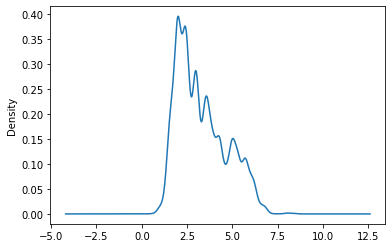

In [120]:
displ.plot.kde()

In [122]:
displ.fillna(displ.median())

0        2.0
1        4.9
2        2.2
3        5.2
4        2.2
        ... 
41139    2.2
41140    2.2
41141    2.2
41142    2.2
41143    2.2
Name: displ, Length: 41144, dtype: float64

<AxesSubplot:ylabel='Density'>

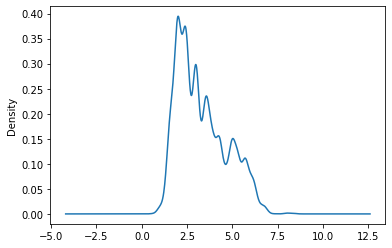

In [123]:
displ.fillna(displ.median()).plot.kde()

### 5. Clip the values of a numeric series to between to 10th and 90th percentiles.

In [124]:
UHighway = data.UHighway
UHighway

0        35.0000
1        19.0000
2        47.0000
3        16.6667
4        32.0000
          ...   
41139    37.0000
41140    39.0000
41141    34.0000
41142    34.0000
41143    29.0000
Name: UHighway, Length: 41144, dtype: float64

<AxesSubplot:ylabel='Density'>

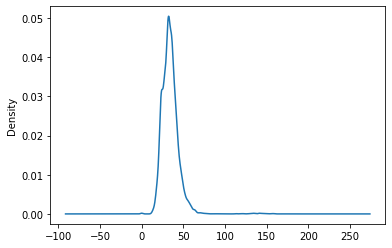

In [127]:
UHighway.plot.kde()


<AxesSubplot:>

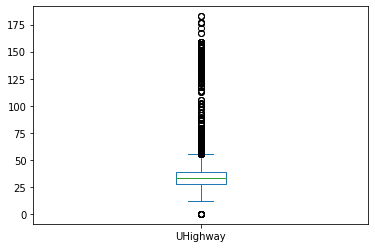

In [128]:
UHighway.plot.box()

In [132]:
UHighway.clip(lower = UHighway.quantile(0.10),
              upper = UHighway.quantile(0.9))

0        35.0
1        23.0
2        45.3
3        23.0
4        32.0
         ... 
41139    37.0
41140    39.0
41141    34.0
41142    34.0
41143    29.0
Name: UHighway, Length: 41144, dtype: float64

<AxesSubplot:ylabel='Density'>

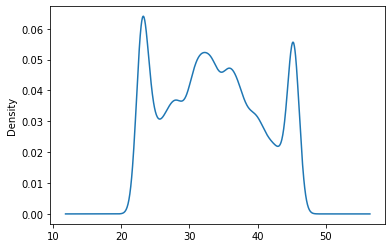

In [133]:
UHighway.clip(lower = UHighway.quantile(0.10),
              upper = UHighway.quantile(0.9)).plot.kde()

<AxesSubplot:>

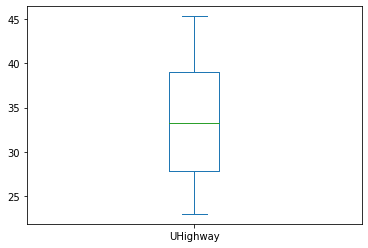

In [134]:
UHighway.clip(lower = UHighway.quantile(0.10),
              upper = UHighway.quantile(0.9)).plot.box()

### 6. Using a categorical column, replace any value that is not in the top 5 most frequent values with 'Other'.

In [138]:
data.select_dtypes(object).columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

In [139]:
fuel_type = data.fuelType
fuel_type.value_counts()

Regular                        26447
Premium                        11542
Gasoline or E85                 1317
Diesel                          1180
Electricity                      203
Premium or E85                   127
Midgrade                         106
CNG                               60
Premium and Electricity           53
Regular Gas and Electricity       41
Premium Gas or Electricity        36
Gasoline or natural gas           20
Gasoline or propane                8
Regular Gas or Electricity         4
Name: fuelType, dtype: int64

In [140]:
top5 = fuel_type.value_counts().index[:5]
top5

Index(['Regular', 'Premium', 'Gasoline or E85', 'Diesel', 'Electricity'], dtype='object')

In [141]:
def fuel_category(val):
    if val in top5:
        return val
    return 'other'

In [142]:
fuel_type.apply(fuel_category)

0        Regular
1        Regular
2        Regular
3        Regular
4        Premium
          ...   
41139    Regular
41140    Regular
41141    Regular
41142    Regular
41143    Premium
Name: fuelType, Length: 41144, dtype: object

In [143]:
fuel_type.apply(fuel_category).value_counts()

Regular            26447
Premium            11542
Gasoline or E85     1317
Diesel              1180
other                455
Electricity          203
Name: fuelType, dtype: int64